In [117]:
from datasets import load_dataset
import pickle
from transformers import GPT2Tokenizer
from datasets import DatasetDict
import matplotlib.pyplot as plt

import torch as t
import torch.nn as nn
import torch.nn.functional as f

In [70]:
dataset:DatasetDict = load_dataset("roneneldan/TinyStoriesInstruct") # type: ignore

for i in range(16):
    print(dataset['train'][i]['text'])

with open('dataset_unprocessed.txt', 'wb') as output_file:
    pickle.dump(dataset, output_file)

# with open('dataset_unprocessed.txt', 'rb') as input_file:
#     dataset = pickle.load(input_file)

print(dataset)

Found cached dataset text (/Users/galen/.cache/huggingface/datasets/roneneldan___text/roneneldan--TinyStoriesInstruct-75365d46742beced/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2)


  0%|          | 0/2 [00:00<?, ?it/s]

Features: Dialogue
Words: quit, oak, gloomy
Summary: Sara and Ben were playing in the park, but Sara wanted to go home because it was cold and dark. Ben convinced her to stay and play, but eventually agreed to go home and have hot cocoa.
Story: 

Sara and Ben were playing in the park. They liked to climb the big oak tree and pretend they were birds. They made nests with leaves and twigs and sang songs.
But today, the sky was gloomy and the wind was cold. Sara felt sad and cold. She wanted to go home and have some hot cocoa.
"Ben, I want to quit," she said. "It's too cold and dark. Let's go home."
Ben looked at Sara and frowned. He liked the oak tree and the park. He wanted to stay and play.
"No, Sara, don't quit," he said. "It's fun here. Look, there's a squirrel. Let's chase it."
Sara shook her head. She didn't want to chase the squirrel. She wanted to go home and have some hot cocoa.
"Please, Ben, let's go home," she said. "We can play here another day. I'm cold and hungry."
Ben saw 

In [73]:
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")


In [95]:
linebreak_test = tokenizer("something \n with a line \n break")
gen_text = tokenizer.batch_decode(linebreak_test['input_ids'])
print(linebreak_test)
print(gen_text)

{'input_ids': [18927, 220, 198, 351, 257, 1627, 220, 198, 2270], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
['something', ' ', '\n', ' with', ' a', ' line', ' ', '\n', ' break']


In [96]:
print(len(dataset['train'])) 

21755681


In [86]:
dat_tok = tokenizer(dataset['train'][:10000]['text'], return_attention_mask=False)
print('done tokenizing')
print(dat_tok.keys())


done tokenizing
dict_keys(['input_ids'])


In [106]:
for i in range(17):
    print(dat_tok['input_ids'][i])

[23595, 25, 34709]
[37117, 25, 11238, 11, 26210, 11, 46400]
[22093, 25, 24799, 290, 3932, 547, 2712, 287, 262, 3952, 11, 475, 24799, 2227, 284, 467, 1363, 780, 340, 373, 4692, 290, 3223, 13, 3932, 9431, 607, 284, 2652, 290, 711, 11, 475, 4191, 4987, 284, 467, 1363, 290, 423, 3024, 35845, 13]
[11605, 25, 220]
[]
[50, 3301, 290, 3932, 547, 2712, 287, 262, 3952, 13, 1119, 8288, 284, 12080, 262, 1263, 26210, 5509, 290, 16614, 484, 547, 10087, 13, 1119, 925, 44382, 351, 5667, 290, 665, 9235, 290, 25889, 7259, 13]
[1537, 1909, 11, 262, 6766, 373, 46400, 290, 262, 2344, 373, 4692, 13, 24799, 2936, 6507, 290, 4692, 13, 1375, 2227, 284, 467, 1363, 290, 423, 617, 3024, 35845, 13]
[1, 11696, 11, 314, 765, 284, 11238, 553, 673, 531, 13, 366, 1026, 338, 1165, 4692, 290, 3223, 13, 3914, 338, 467, 1363, 526]
[11696, 3114, 379, 24799, 290, 32198, 13, 679, 8288, 262, 26210, 5509, 290, 262, 3952, 13, 679, 2227, 284, 2652, 290, 711, 13]
[1, 2949, 11, 24799, 11, 836, 470, 11238, 553, 339, 531, 13, 366, 10

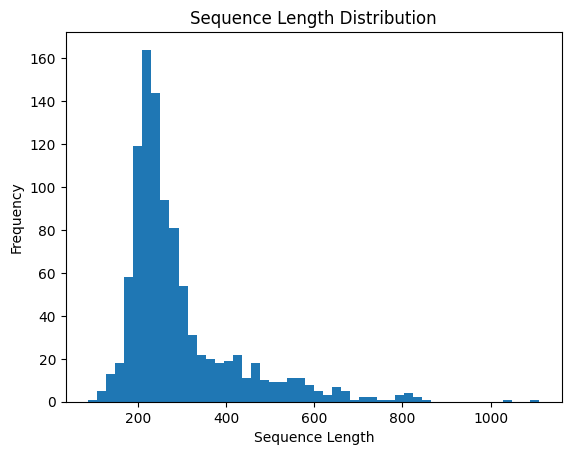

In [120]:
eot_token_id = 50256
linebreak_token_id = 198

new_dat_tok = []
new_sample = []

for sample in dat_tok['input_ids']:
    for token in sample:
        if token == eot_token_id:
            new_sample.append(token)
            new_dat_tok.append(new_sample)
            new_sample = []
            break
        else:
            new_sample.append(token)
    new_sample.append(linebreak_token_id)


sequence_lengths = [len(seq) for seq in new_dat_tok]
plt.hist(sequence_lengths, bins=50)
plt.title("Sequence Length Distribution"); plt.xlabel("Sequence Length"); plt.ylabel("Frequency")
plt.show()




In [87]:

with open('dataset_train_tokenized_small.txt', 'wb') as output_file:
    pickle.dump(dat_tok, output_file)

# with open('dataset_tokenized.txt', 'rb') as input_file:
#     dat_tok = pickle.load(input_file)


In [ ]:

print(test_tok)
print(test_tok['input_ids'][0])
gen_text = tokenizer.batch_decode(test_tok['input_ids'][0])
print(gen_text)

In [ ]:

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

tokenized_dataset = squad_dataset.map(lambda x: tokenizer(x['context']), batched=True)

In [8]:
from transformers import AutoTokenizer


In [9]:

tokenizer = AutoTokenizer.from_pretrained("roneneldan/TinyStories-Instruct-33M")
print(tokenizer(dataset['train'][0]['text'])) # type: ignore

def tokenization(dat):
    return tokenizer(dat["text"])

dtrain = dataset["train"].map(tokenization, batched=True) # type: ignore
dtest = dataset["test"].map(tokenization, batched=True) # type: ignore



{'input_ids': [3198, 1110, 11, 257, 1310, 2576, 3706, 20037, 1043, 257, 17598, 287, 607, 2119, 13, 1375, 2993, 340, 373, 2408, 284, 711, 351, 340, 780, 340, 373, 7786, 13, 20037, 2227, 284, 2648, 262, 17598, 351, 607, 1995, 11, 523, 673, 714, 34249, 257, 4936, 319, 607, 10147, 13], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Loading cached processed dataset at /Users/galen/.cache/huggingface/datasets/roneneldan___text/roneneldan--TinyStories-606807761d49cf6d/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2/cache-149fa0818856e822.arrow


KeyError: 'test'

In [10]:
print(dtrain)

Dataset({
    features: ['text', 'input_ids', 'attention_mask'],
    num_rows: 30415547
})


In [12]:
dtrain.set_format(type="torch", columns=["input_ids", "attention_mask"])

dtrain.format['type']

'torch'

In [13]:
import torch as t
import torch.nn as nn
import torch.nn.functional as f
t.set_default_device('mps')

In [14]:
# create a transformer
class trans(nn.Module):
    def __init__(self, dm=512):
        super().__init__()
        self.inbed = nn.Linear(50257, dm)
        self.think = nn.TransformerEncoderLayer(d_model=dm, nhead=4, activation='gelu')
        self.thinker = nn.TransformerEncoder(self.think, num_layers=8)
        self.out = nn.Linear(dm, 2)
    def forward(self, x):
        mask = nn.Transformer.generate_square_subsequent_mask(x.shape[1])
        x = self.inbed(x)
        x = self.thinker(x, mask=mask, is_causal=True)
        return self.out(x)
    
storier = trans()